In [304]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm

# Read data

In [305]:
dir_name = f"fit_models_py_raraki_2023-10-26_CONUS"
# dir_name = f"fit_models_py_raraki_2023-10-26_CONUS"
data_dir = "/home/raraki/waves/projects/smap-drydown/data"
datarod_dir = "datarods"
anc_dir = "SMAP_L1_L3_ANC_STATIC"
anc_file = "anc_info.csv"
IGBPclass_file = "IGBP_class.csv"
ai_file = "AridityIndex_from_datarods.csv"

In [306]:
input_file = rf"/home/raraki/waves/projects/smap-drydown/output/{dir_name}/all_results.csv"
_df = pd.read_csv(input_file)
coord_info_file = "/home/raraki/waves/projects/smap-drydown/data/datarods/coord_info.csv"
coord_info = pd.read_csv(coord_info_file)
df = _df.merge(coord_info, on=['EASE_row_index', 'EASE_column_index'], how='left')
print(len(df))
df.head()

103118


,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,exp_r_squared,exp_y_opt,q_k,q_q,q_delta_theta,q_r_squared,q_y_opt,id,latitude,longitude
0,0,49,178,2015-07-06,2015-07-16,[ 0 1 2 4 5 7 8 9 10],[0.2700876 0.23557265 0.21525141 0.1968715 0...,0.075926,0.328024,4.546666,...,0.975346,"[0.26412165493388085, 0.24139738415785048, 0.2...",0.202903,1.918047e+00,0.755568,0.977789,"[0.26640344948855904, 0.2404375016771953, 0.22...",47414,49.00465,-113.34025
1,1,49,178,2015-07-18,2015-07-22,[0 1 3 4],[0.25743487 0.21624508 0.23729874 0.21127926],0.075926,0.328024,4.690045,...,0.499637,"[0.2572866811355069, 0.21781057269789478, 0.21...",4.690045,9.900271e+00,0.705167,0.514283,"[0.25369743783879695, 0.2338783111456459, 0.21...",47414,49.00465,-113.34025
2,2,49,178,2016-10-16,2016-10-27,[ 0 1 3 4 5 6 8 9 11],[0.27266908 0.23120848 0.23455536 0.23573506 0...,0.075926,0.328024,1.012646,...,0.760390,"[0.2602228482451473, 0.2502020562923525, 0.235...",1.012646,8.347464e+00,0.751935,0.813172,"[0.26548764589419876, 0.2494341356425815, 0.23...",47414,49.00465,-113.34025
3,3,49,178,2017-09-14,2017-09-22,[0 1 3 4 6 7 8],[0.20092689 0.17785274 0.19096084 0.17382596 0...,0.075926,0.328024,1.716990,...,0.617091,"[0.2030338659424098, 0.19249319777760432, 0.17...",0.034580,3.394039e-13,0.504964,0.675996,"[0.2032265298566947, 0.19450887316881393, 0.17...",47414,49.00465,-113.34025
4,4,49,178,2019-04-04,2019-04-09,[0 1 2 4 5],[0.26918507 0.2656639 0.25493159 0.26055649 0...,0.075926,0.328024,1.790631,...,0.691905,"[0.26906007192877474, 0.26413883069662036, 0.2...",0.016283,2.124995e-09,0.764159,0.698771,"[0.2685692772512031, 0.26446439047231707, 0.26...",47414,49.00465,-113.34025


In [338]:
df.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'id_x', 'latitude',
       'longitude', 'sand_fraction', 'IGBP_landcover', 'id_y', 'AI', 'class',
       'name', 'description', 'abbreviation', '_diff_R2'],
      dtype='object')

In [307]:
file = os.path.join(data_dir, datarod_dir, anc_file)
df_anc = pd.read_csv(file).drop(["spatial_ref", "latitude", "longitude"], axis=1)
df_anc.loc[df_anc["sand_fraction"] < 0, "sand_fraction"] = np.nan
df_anc.head()

,sand_fraction,IGBP_landcover,EASE_column_index,EASE_row_index
0,NaN,0,0,0
1,NaN,0,1,0
2,NaN,0,2,0
3,NaN,0,3,0
4,NaN,0,4,0


In [308]:
file = os.path.join(data_dir, datarod_dir, ai_file)
df_ai = pd.read_csv(file).drop(["latitude", "longitude"], axis=1)
df_ai.loc[df_ai["AI"] < 0, "AI"] = np.nan
df_ai.head()

,id,EASE_row_index,EASE_column_index,AI
0,0,0,0,0.0
1,1,0,1,0.0
2,2,0,2,0.0
3,3,0,3,0.0
4,4,0,4,0.0


In [309]:
file = os.path.join(data_dir, anc_dir, IGBPclass_file)
IGBPclass = pd.read_csv(file)
IGBPclass

,class,name,description,abbreviation
0,0,Open water,Open water,OW
1,1,Evergreen needleleaf forests,Lands dominated by needleleaf woody vegetation...,ENF
2,2,Evergreen broadleaf forests,Lands dominated by broadleaf woody vegetation ...,EBF
3,3,Deciduous needleleaf forests,Lands dominated by woody vegetation with a per...,DNF
4,4,Deciduous broadleaf forests,Lands dominated by woody vegetation with a per...,DBF
5,5,Mixed forests,Lands dominated by trees with a percent cover ...,MF
6,6,Closed shrublands,Lands with woody vegetation less than 2 m tall...,CSH
7,7,Open shrublands,Lands with woody vegetation less than 2 m tall...,OSH
8,8,Woody savannas,Lands with herbaceous and other understory sys...,WSA
9,9,Savannas,Lands with herbaceous and other understory sys...,SAV


In [310]:
df = df.merge(df_anc, on=['EASE_row_index', 'EASE_column_index'], how='left')
df = df.merge(df_ai, on=['EASE_row_index', 'EASE_column_index'], how='left')
df = pd.merge(df, IGBPclass, left_on='IGBP_landcover', right_on='class', how='left')
print(len(df))
df.head()

103118


,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,latitude,longitude,sand_fraction,IGBP_landcover,id_y,AI,class,name,description,abbreviation
0,0,49,178,2015-07-06,2015-07-16,[ 0 1 2 4 5 7 8 9 10],[0.2700876 0.23557265 0.21525141 0.1968715 0...,0.075926,0.328024,4.546666,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
1,1,49,178,2015-07-18,2015-07-22,[0 1 3 4],[0.25743487 0.21624508 0.23729874 0.21127926],0.075926,0.328024,4.690045,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
2,2,49,178,2016-10-16,2016-10-27,[ 0 1 3 4 5 6 8 9 11],[0.27266908 0.23120848 0.23455536 0.23573506 0...,0.075926,0.328024,1.012646,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
3,3,49,178,2017-09-14,2017-09-22,[0 1 3 4 6 7 8],[0.20092689 0.17785274 0.19096084 0.17382596 0...,0.075926,0.328024,1.716990,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO
4,4,49,178,2019-04-04,2019-04-09,[0 1 2 4 5],[0.26918507 0.2656639 0.25493159 0.26055649 0...,0.075926,0.328024,1.790631,...,49.00465,-113.34025,0.352813,12,47414,0.849951,12,Croplands,Lands covered with temporary crops followed by...,CRO


In [311]:
df = df.assign(_diff_R2=df["q_r_squared"] - df["exp_r_squared"])

In [312]:
filtered_df = df[df['q_r_squared'] >= 0.7].copy()
filtered_df2 = df[(df['q_r_squared'] >= 0.7) | (df['exp_r_squared'] >= 0.7)].copy()
filtered_df_expon = df[df['exp_r_squared'] >= 0.7].copy()

# Expon vs q model

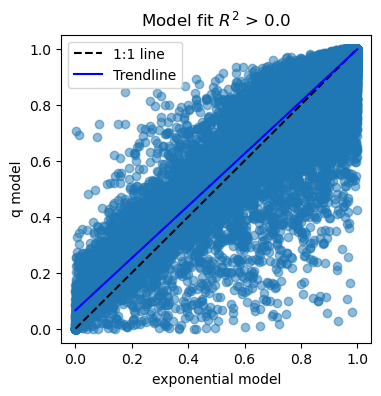

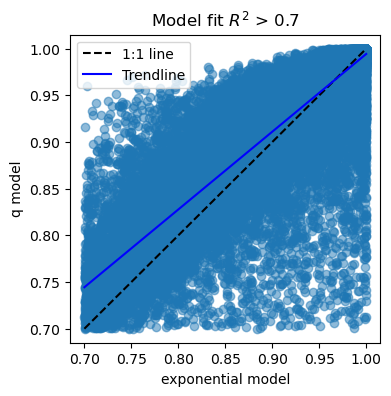

In [313]:
def plot_R2_models(R2_threshold):
    # Assuming you have a DataFrame named 'df' with columns 'exp_r_squared' and 'q_r_squared'
    # Replace 'df' with your actual DataFrame name

    x = df['exp_r_squared'].values
    y = df['q_r_squared'].values
    success_fit_idx = (x > R2_threshold) & (y > R2_threshold)

    # Create a scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x[success_fit_idx], y[success_fit_idx], alpha=0.5)  # alpha controls point transparency
    plt.title(f'Model fit $R^2$ > {R2_threshold}')
    plt.xlabel('exponential model')
    plt.ylabel('q model')
    plt.ylabel

    # Set the x and y-axis limits to the range [0.8, 1]
    plt.plot([R2_threshold, 1], [R2_threshold, 1], color='k', linestyle='--', label='1:1 line')

    # Add a trendline
    coefficients = np.polyfit(x[success_fit_idx], y[success_fit_idx], 1)
    trendline_x = np.array([R2_threshold, 1])
    trendline_y = coefficients[0] * trendline_x + coefficients[1]
    plt.plot(trendline_x, trendline_y, color='blue', label='Trendline')
    plt.legend()

plot_R2_models(R2_threshold=0.0)
plot_R2_models(R2_threshold=0.7)

# Plot longitudinal distribution (lat,lon)

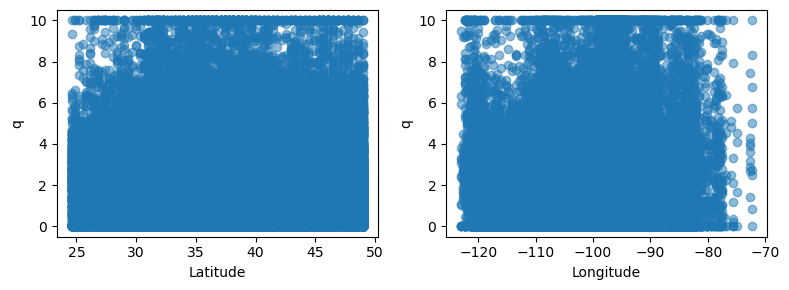

In [314]:
def plot_param_distribution(df=None, model_type=None, parameter=None):

    varname = f"{model_type}_{parameter}"
    # Create a figure and a 1x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))

    # Scatter plot for latitude vs. q
    axs[0].scatter(df['latitude'], df[varname], alpha=0.5)
    axs[0].set_xlabel('Latitude')
    axs[0].set_ylabel(f'{parameter}')

    # Scatter plot for longitude vs. q
    axs[1].scatter(df['longitude'], df[varname], alpha=0.5)
    axs[1].set_xlabel('Longitude')
    axs[1].set_ylabel(f'{parameter}')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_param_distribution(df=filtered_df, model_type="q", parameter="q")

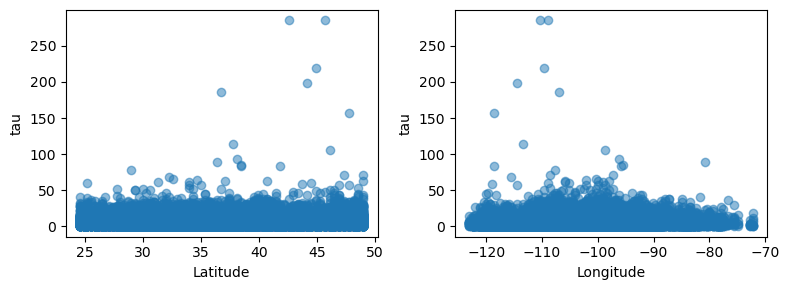

In [315]:
plot_param_distribution(df=filtered_df, model_type="exp", parameter="tau")

# Plot in map

In [316]:
# Define the three colors in the colormap
import matplotlib.colors as mcolors
colors = ['#d8b365', '#f5f5f5', '#5ab4ac']

# Create a custom colormap
# cmap = mcolors.LinearSegmentedColormap.from_list('custom_BrBG', colors, N=256)
cmap = "BrBG"

In [317]:
def create_mean_dataarray(df=None, model_type=None, parameter=None):
    varname = f"{model_type}_{parameter}"
    mean_values = df.groupby(['latitude', 'longitude'])[varname].mean()
    data_array = mean_values.reset_index().pivot(index='latitude', columns='longitude', values=varname)
    return data_array

In [318]:
def plot_map(data_array=None, parameter=None, norm=None):
    # Create a figure and axes with Cartopy projection
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Create a grid of lat and lon coordinates
    lons, lats = np.meshgrid(data_array.columns, data_array.index)
    # Plot the heatmap using Cartopy
    im = ax.pcolormesh(lons, lats, data_array.values, norm=norm, cmap=cmap, transform=ccrs.PlateCarree(),) #, vmin=vmin, vmax=vmax)

    # Add coastlines
    ax.coastlines()

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', label=f'Mean {parameter}')
    cbar.ax.set_position([0.92, 0.1, 0.02, 0.8])
    
    # Set plot title and labels
    ax.set_title(f'Mean {parameter} per pixel')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()
    plt.tight_layout()

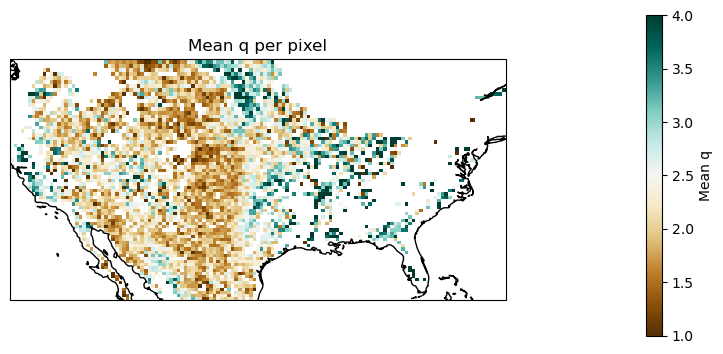

<Figure size 640x480 with 0 Axes>

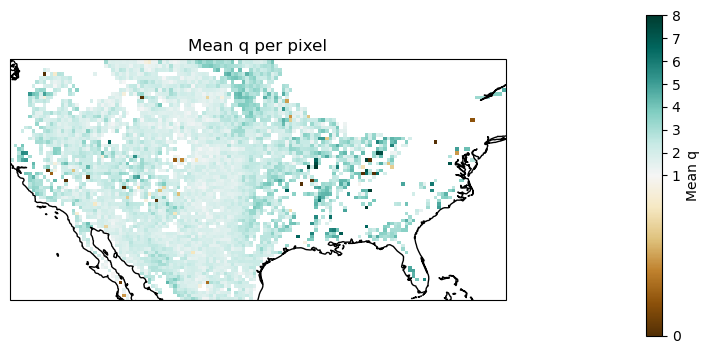

<Figure size 640x480 with 0 Axes>

In [319]:
da_q = create_mean_dataarray(df=filtered_df, model_type="q", parameter="q")

norm = TwoSlopeNorm(vmin=1, vcenter=2.5, vmax=4)
plot_map(data_array=da_q, parameter="q", norm=norm)
norm = TwoSlopeNorm(vmin=0, vcenter=1, vmax=8)
plot_map(data_array=da_q, parameter="q", norm=norm)

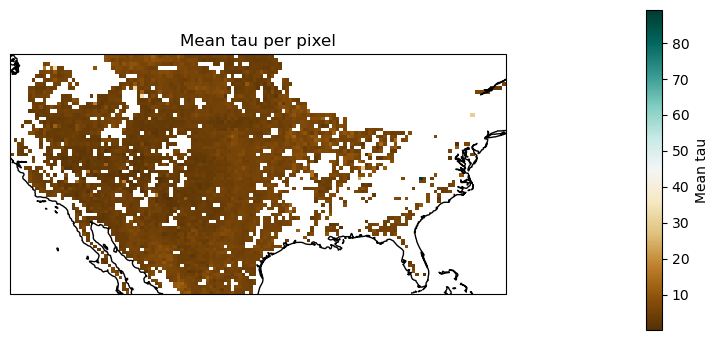

<Figure size 640x480 with 0 Axes>

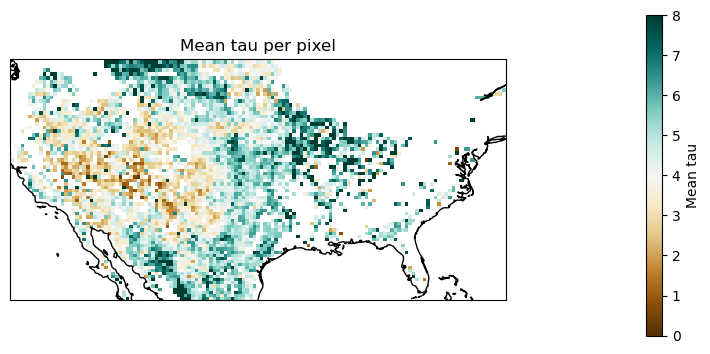

<Figure size 640x480 with 0 Axes>

In [320]:
da_q = create_mean_dataarray(df=filtered_df, model_type="exp", parameter="tau")
plot_map(data_array=da_q, parameter="tau")
norm = TwoSlopeNorm(vmin=0, vcenter=4, vmax=8)
plot_map(data_array=da_q, parameter="tau", norm=norm)

In [388]:
filtered_df["k_dernormalize"] = filtered_df["q_k"] * (filtered_df["max_sm"] - filtered_df["min_sm"])

In [389]:
filtered_df["q_AET/PET"] = filtered_df["k_dernormalize"]/filtered_df["pet"]

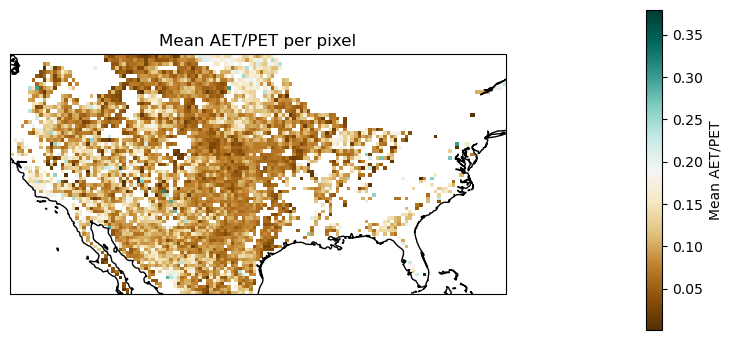

<Figure size 640x480 with 0 Axes>

In [390]:
da_AETfrac = create_mean_dataarray(df=filtered_df, model_type="q", parameter="AET/PET")
plot_map(data_array=da_AETfrac, parameter="AET/PET")

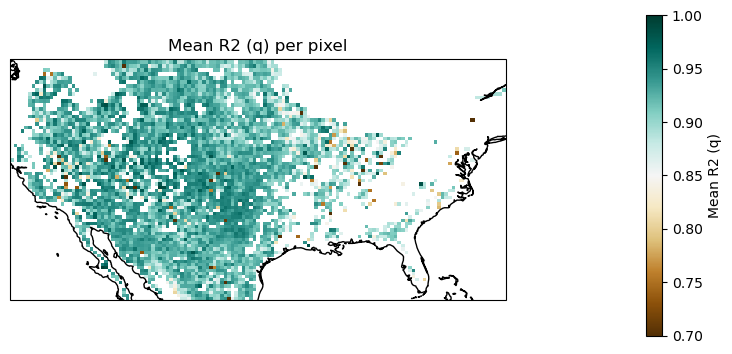

<Figure size 640x480 with 0 Axes>

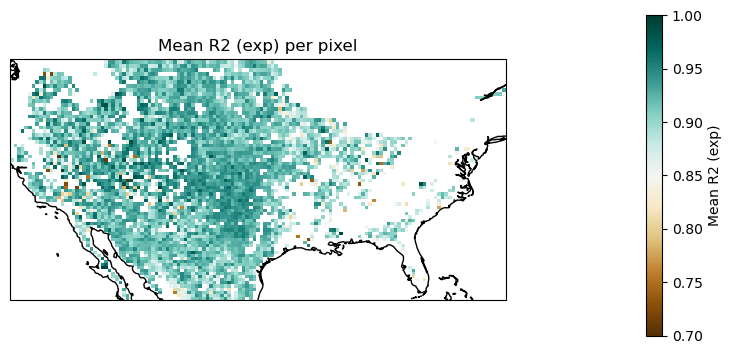

<Figure size 640x480 with 0 Axes>

In [323]:
norm = TwoSlopeNorm(vmin=0.7, vcenter=(0.7+1.0)/2, vmax=1.0)
da_R2_q = create_mean_dataarray(df=filtered_df2, model_type="q", parameter="r_squared")
plot_map(data_array=da_R2_q, parameter="R2 (q)", norm=norm)

da_R2_exp = create_mean_dataarray(df=filtered_df2, model_type="exp", parameter="r_squared")
plot_map(data_array=da_R2_exp, parameter="R2 (exp)", norm=norm)
# norm = TwoSlopeNorm(vmin=0, vcenter=1, vmax=8)
# plot_map(data_array=da_q, parameter="q", norm=norm)

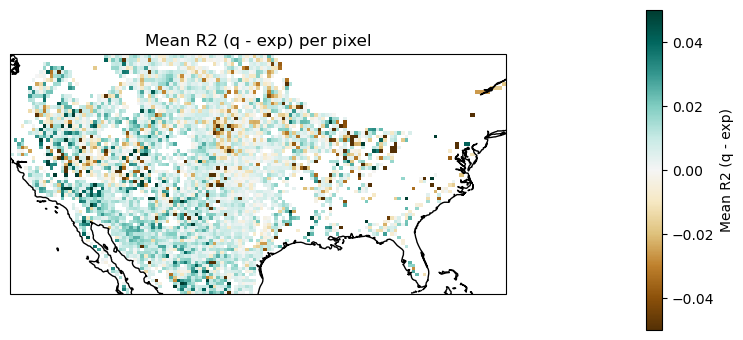

<Figure size 640x480 with 0 Axes>

In [324]:
norm = TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=0.05)
diff_R2 = create_mean_dataarray(df=filtered_df2, model_type="", parameter="diff_R2")
plot_map(data_array=diff_R2, parameter="R2 (q - exp)", norm=norm)

# Boxplot

In [325]:
import seaborn as sns

In [326]:
n_bins = 10
sand_bins = [i * 0.1 for i in range(11)]
ai_bins = [i * 0.25 for i in range(9)]
filtered_df['sand_bins'] = pd.cut(filtered_df['sand_fraction'], bins=sand_bins, include_lowest=True)
filtered_df['ai_bins'] = pd.cut(filtered_df['AI'], bins=ai_bins, include_lowest=True)

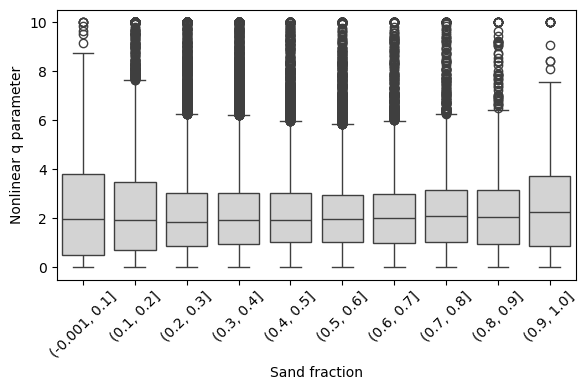

In [327]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='sand_bins', y='q_q', data=filtered_df, boxprops=dict(facecolor='lightgray'))
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("Sand fraction")
plt.tight_layout()

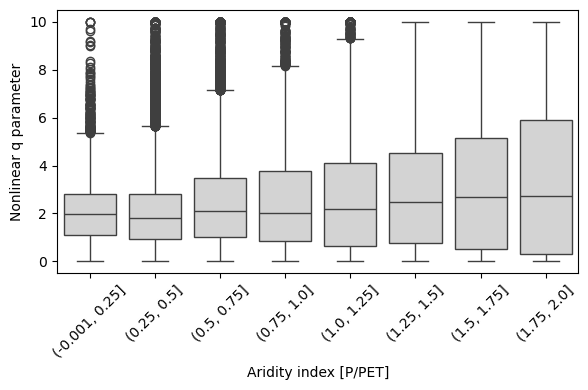

In [328]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='ai_bins', y='q_q', data=filtered_df, boxprops=dict(facecolor='lightgray'))
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("Aridity index [P/PET]")
plt.tight_layout()

In [329]:
df.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'id_x', 'latitude',
       'longitude', 'sand_fraction', 'IGBP_landcover', 'id_y', 'AI', 'class',
       'name', 'description', 'abbreviation', '_diff_R2'],
      dtype='object')

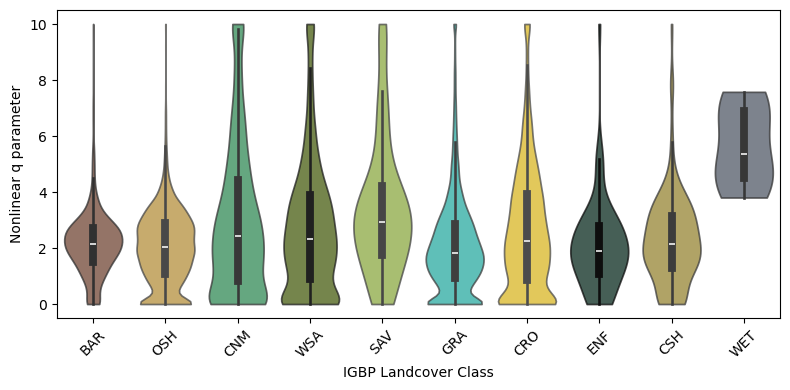

In [330]:
# Define the specific order for your categories.
vegetation_orders = ["BAR", "OSH", "CNM", "WSA", "SAV", "GRA", "CRO", "ENF", "CSH", "WET"]
colors = ["#7A422A", "#C99728", "#229954", "#4C6903", "#92BA31", "#13BFB2", "#F7C906", "#022E1F", "#A68F23", "#4D5A6B"]

# Create a color palette dictionary
palette_dict = dict(zip(vegetation_orders, colors))

fig, ax =  plt.subplots(figsize=(8, 4))
for i, category in enumerate(vegetation_orders):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    sns.violinplot(x='abbreviation', y='q_q', data=subset, order=[category], color=colors[i], ax=ax, alpha=0.75, cut=0)

# ax = sns.violinplot(x='abbreviation', y='q_q', data=filtered_df, order=vegetation_orders, palette=palette_dict) # boxprops=dict(facecolor='lightgray'), 
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("IGBP Landcover Class")
plt.tight_layout()

/tmp/ipykernel_1434949/575220531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


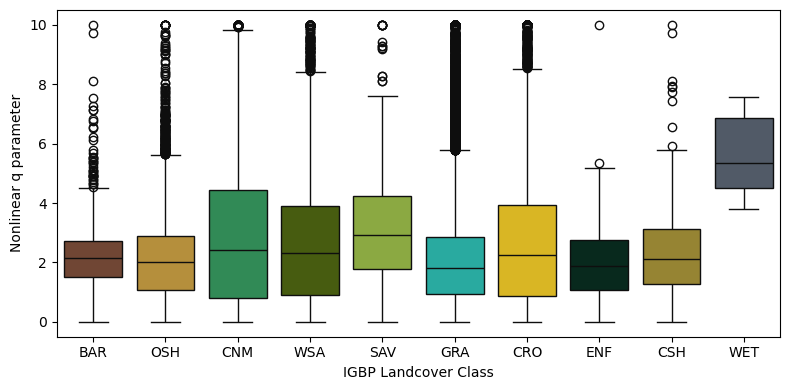

In [331]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the boxplot with specified colors and increased alpha
sns.boxplot(
    x='abbreviation',
    y='q_q',
    data=filtered_df,
    # hue = colors, 
    order=vegetation_orders,
    palette=colors,
    ax=ax
)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor(mcolors.to_rgba((r, g, b), alpha=0.5))

# Optionally, adjust layout
plt.tight_layout()
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("IGBP Landcover Class")
# Show the plot
plt.show()

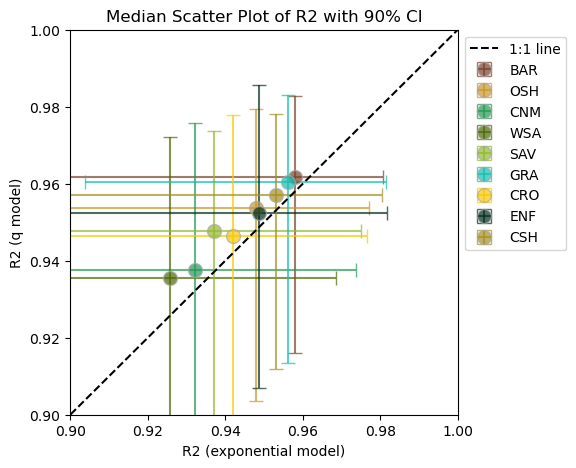

In [332]:
# Assuming 'df' is your DataFrame, 'vegetation_class' is your categorical column and 'value' is the numerical column.

# Set the figure size for better visibility
plt.figure(figsize=(5, 5))

# Get unique categories
categories = vegetation_orders

# Initialize a dictionary to store the medians and CIs
stats_dict = {}

# Calculate median and 90% confidence intervals for each vegetation class
for i, category in enumerate(categories[:-1]):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    
    # Median calculation
    exp_median = subset['exp_r_squared'].median()
    q_median = subset['q_r_squared'].median()
    
    # 90% CI calculation, using the 5th and 95th percentiles
    exp_ci_low, exp_ci_high = np.percentile(subset['exp_r_squared'], [25, 75])
    q_ci_low, q_ci_high = np.percentile(subset['q_r_squared'], [25, 75])
    
    # Store in dict
    stats_dict[category] = {
        'exp_median': exp_median,
        'q_median': q_median,
        'exp_ci': (exp_median - exp_ci_low, exp_ci_high - exp_median),
        'q_ci': (q_median - q_ci_low, q_ci_high - q_median),
        'color': colors[i]
    }

# Now plot medians with CIs
for category, stats in stats_dict.items():
    plt.errorbar(stats['exp_median'], stats['q_median'],
                 xerr=np.array([[stats['exp_ci'][0]], [stats['exp_ci'][1]]]),
                 yerr=np.array([[stats['q_ci'][0]], [stats['q_ci'][1]]]),
                 fmt='o', label=category, capsize=5, capthick=2, color=stats['color'], alpha=0.7,markersize=10 , mec='darkgray', mew=1)

# Add a trendline
# Set the x and y-axis limits to the range [0.8, 1]
plt.plot([0.8, 1], [0.8, 1], color='k', linestyle='--', label='1:1 line')

# Add labels and title
plt.xlabel('R2 (exponential model)')
plt.ylabel('R2 (q model)')
plt.title('Median Scatter Plot of R2 with 90% CI')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(0.9, 1.0)
plt.ylim(0.9, 1.0)

ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("IGBP Landcover Class")

# Show the plot
plt.show()

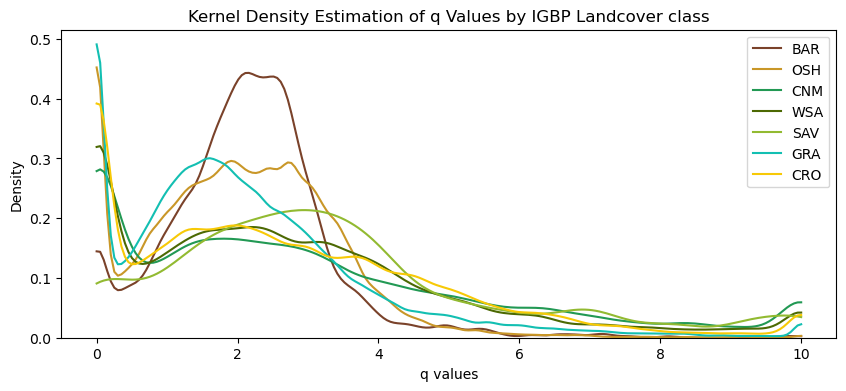

In [333]:
plt.figure(figsize=(10, 4))
for i, category in enumerate(vegetation_order):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    sns.kdeplot(subset['q_q'], label=category, bw_adjust=0.5, color=colors[i], cut=0)
# Set titles and labels
plt.title('Kernel Density Estimation of q Values by IGBP Landcover class')
plt.xlabel('q values')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [334]:
from functions import q_drydown, exponential_drydown, loss_model

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

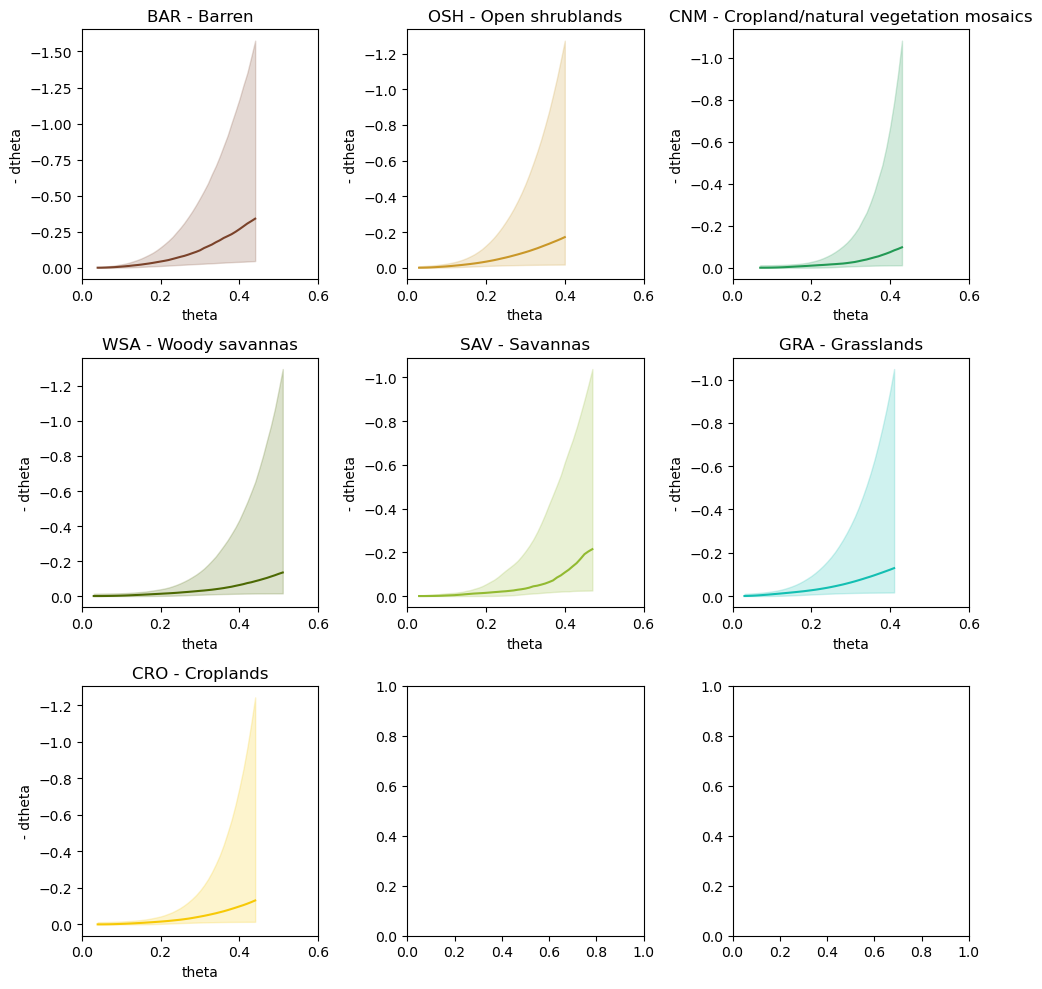

In [387]:
theta = np.arange(0, 1, 0.01)
results = {}
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_order):
    if i >= 9:  # We only have 7 categories
        break
    ax = axes[i]  # Select the corresponding subplot axis
    category_dtheta = []
    category_data = filtered_df[filtered_df['abbreviation'] == category]
    
    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = category_data['min_sm'].quantile(0.10)
    theta_max = category_data['max_sm'].quantile(0.90)
    
    for _, row in category_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        min_sm = row['min_sm']
        max_sm = row['max_sm']
        
        denormalized_k = k * (max_sm-min_sm)
        
        if (theta_max-theta_min)!=0:
            dtheta = loss_model(theta, q, denormalized_k, theta_wp=theta_min, theta_star=theta_max)
            category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()
    perc_10_losses = dtheta_df.quantile(0.10)
    perc_90_losses = dtheta_df.quantile(0.90)
    

    # Store results for later use
    results[category] = {
        'median': median_losses,
        'perc_10': perc_10_losses,
        'perc_90': perc_90_losses
    }
    

    # Plot median line
    ax.plot(theta_range, median_losses, label=f'{category} Median', color=colors[i])

    # Fill between the 10th and 90th percentile lines
    ax.fill_between(theta_range, perc_10_losses, perc_90_losses, alpha=0.2, color=colors[i])
    ax.invert_yaxis()
    ax.set_xlabel('theta')
    ax.set_ylabel('- dtheta')
    ax.set_xlim([0, 0.6])
    
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.set_title(f'{category} - {full_name}')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

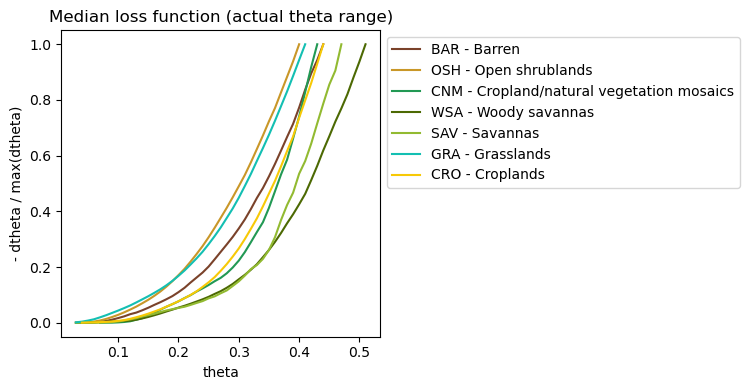

In [458]:
theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_order):
    if i >= 9:  # We only have 7 categories
        break
    category_dtheta = []
    category_data = filtered_df[filtered_df['abbreviation'] == category]
    
    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = category_data['min_sm'].quantile(0.10)
    theta_max = category_data['max_sm'].quantile(0.90)
    
    for _, row in category_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        min_sm = row['min_sm']
        max_sm = row['max_sm']
        
        denormalized_k = k * (max_sm-min_sm)
        dtheta = loss_model(theta, q, denormalized_k, theta_wp=min_sm, theta_star=max_sm)
        category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()
    
    median_losses_norm = median_losses / median_losses.iloc[-1]
    

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta_range, median_losses_norm, label=f'{category} - {full_name}', color=colors[i])

# ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta / max(dtheta)')
ax.set_title('Median loss function (actual theta range)')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

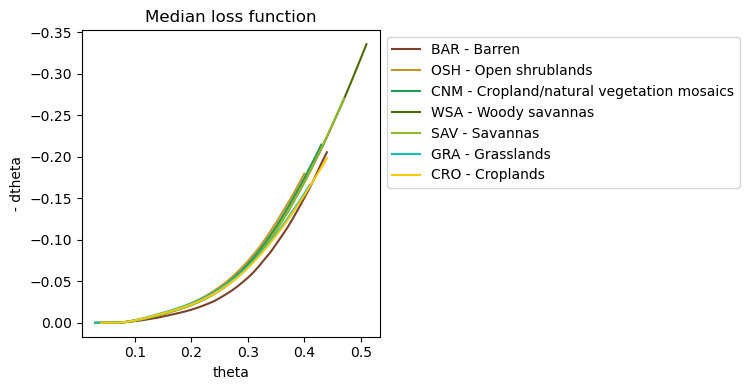

In [456]:
theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_order):
    if i >= 9:  # We only have 7 categories
        break
    category_data = filtered_df[filtered_df['abbreviation'] == category]
    
    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = category_data['min_sm'].quantile(0.10)
    theta_max = category_data['max_sm'].quantile(0.90)
    
    for _, row in category_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        
        denormalized_k = k * (max_sm-min_sm)
        dtheta = loss_model(theta, q, denormalized_k, theta_wp=min_sm, theta_star=max_sm)
        category_dtheta.append(dtheta)
        
        # dtheta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
        # category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta_range, median_losses, label=f'{category} - {full_name}', color=colors[i])

ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta')
ax.set_title('Median loss function')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

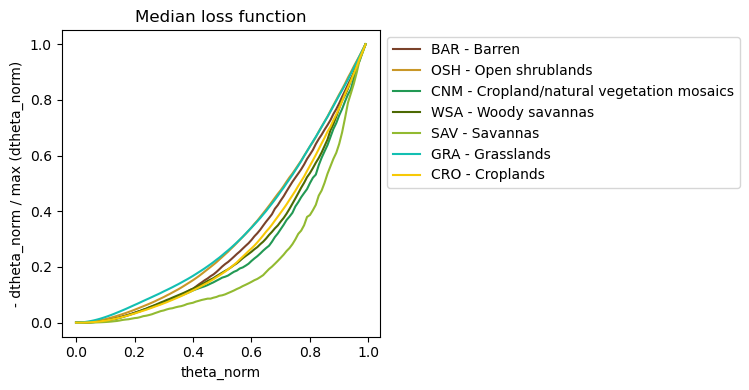

In [453]:
theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_order):
    if i >= 9:  # We only have 7 categories
        break
    category_dtheta = []
    
    for _, row in filtered_df[filtered_df['abbreviation'] == category].iterrows():
        q = row['q_q']
        k = row['q_k']
        dtheta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
        category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    dtheta_df = pd.DataFrame(category_dtheta, columns=theta)

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()
    
    median_losses_norm = median_losses / median_losses[0.99]
    

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta, median_losses_norm, label=f'{category} - {full_name}', color=colors[i])

# ax.invert_yaxis()
ax.set_xlabel('theta_norm')
ax.set_ylabel('- dtheta_norm / max (dtheta_norm)')
ax.set_title('Median loss function')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

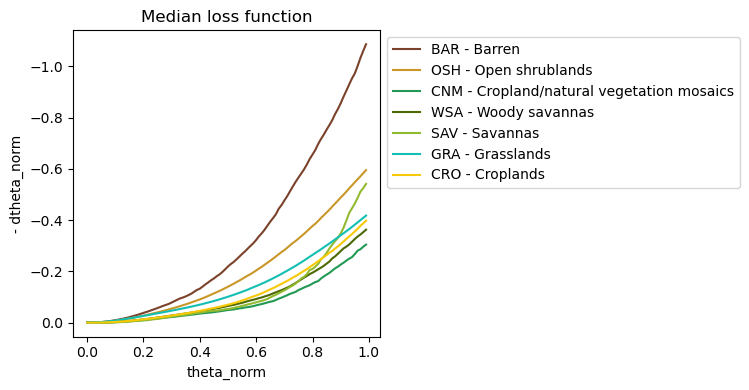

In [451]:


theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_order):
    if i >= 9:  # We only have 7 categories
        break
    category_dtheta = []
    
    for _, row in filtered_df[filtered_df['abbreviation'] == category].iterrows():
        q = row['q_q']
        k = row['q_k']
        dtheta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
        category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    dtheta_df = pd.DataFrame(category_dtheta, columns=theta)

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta, median_losses, label=f'{category} - {full_name}', color=colors[i])

ax.invert_yaxis()
ax.set_xlabel('theta_norm')
ax.set_ylabel('- dtheta_norm')
ax.set_title('Median loss function')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()



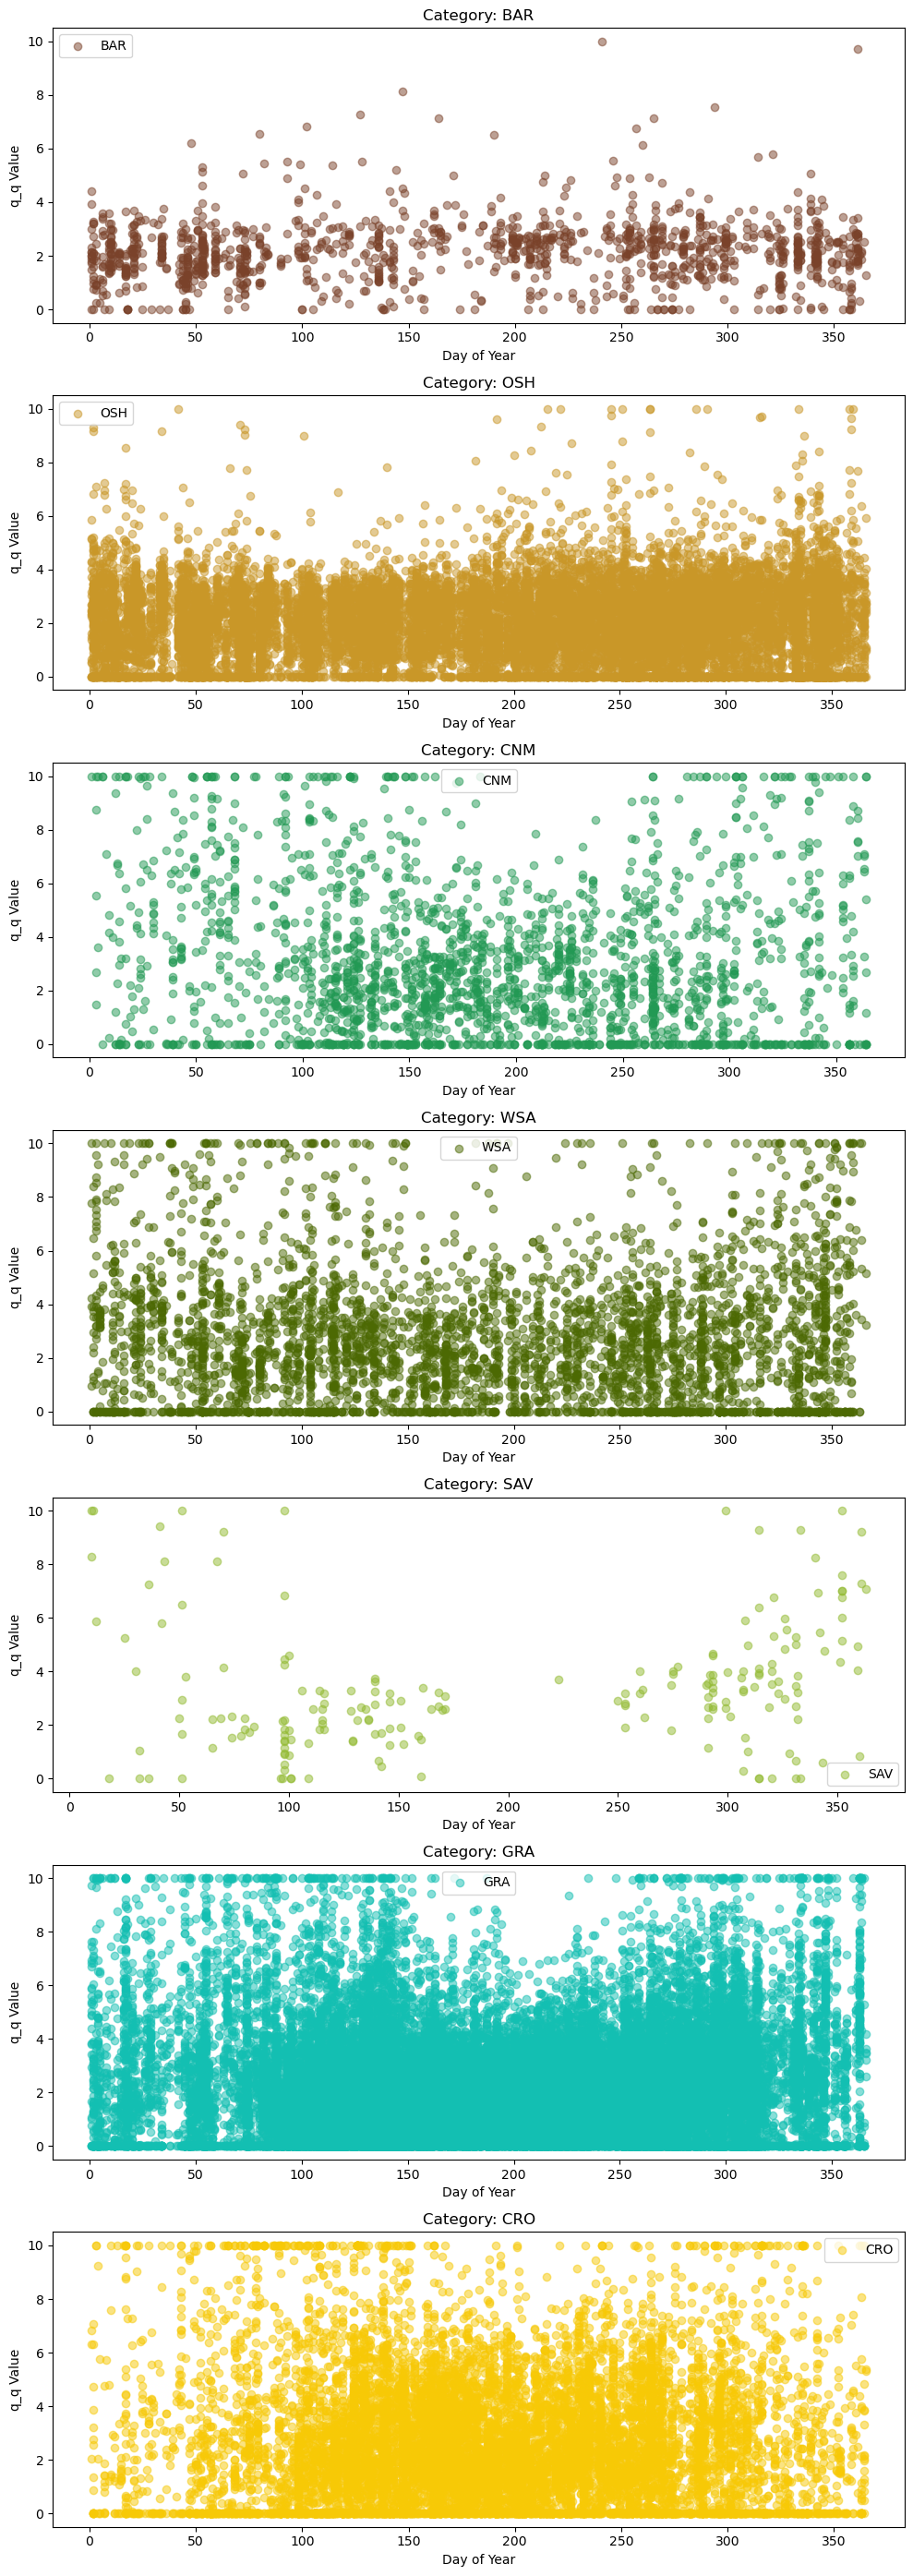

In [423]:
import matplotlib.pyplot as plt

# Extract the day of the year
filtered_df["doy"] = pd.to_datetime(filtered_df['event_start']).dt.dayofyear
num_categories = len(vegetation_order)
fig, axes = plt.subplots(num_categories, 1, figsize=(10, 4 * num_categories))

for i, category in enumerate(vegetation_order):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    ax = axes[i] if num_categories > 1 else axes
    ax.scatter(subset['doy'].values, subset['q_q'].values, label=category, color=colors[i], alpha=0.5)
    ax.legend()
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('q_q Value')
    ax.set_title(f'Category: {category}')

plt.tight_layout()
plt.show()


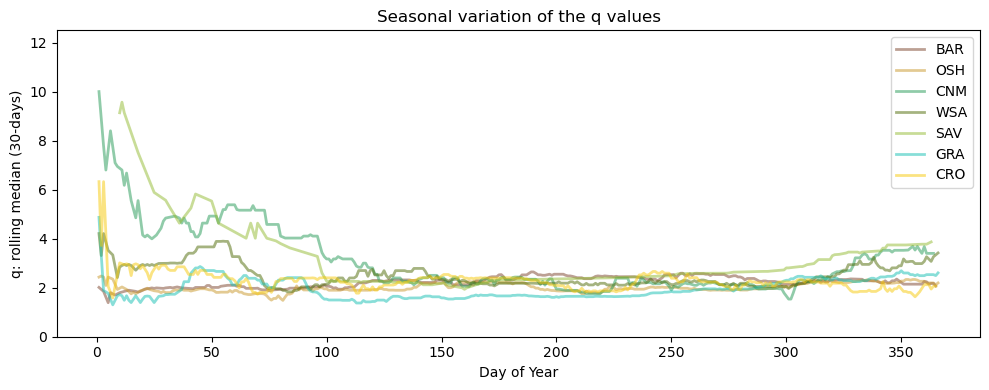

In [449]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df, vegetation_order, and colors are defined

# Extract the day of the year
num_categories = len(vegetation_order)
fig, ax = plt.subplots(1, figsize=(10, 4))

for i, category in enumerate(vegetation_order):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    
    # Group by day of the year and calculate the median of 'q_q'
    subset = subset.reset_index()
    median_values = subset.groupby('doy')['q_q'].median().rolling(window=30, min_periods=1).median()

    # Plot the median values
    ax.plot(median_values.index, median_values.values, label=f'{category}', color=colors[i], linewidth=2, alpha=0.5)

ax.legend()
ax.set_ylim([0,12.5])
ax.set_xlabel('Day of Year')
ax.set_ylabel('q: rolling median (30-days)')
ax.set_title(f'Seasonal variation of the q values')

plt.tight_layout()
plt.show()


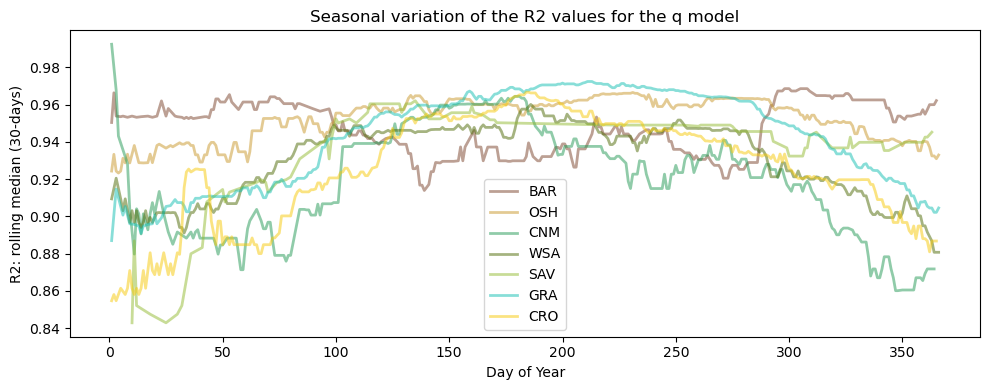

In [443]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df, vegetation_order, and colors are defined

# Extract the day of the year
num_categories = len(vegetation_order)
fig, ax = plt.subplots(1, figsize=(10, 4))

for i, category in enumerate(vegetation_order):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    
    # Group by day of the year and calculate the median of 'q_q'
    subset = subset.reset_index()
    median_values = subset.groupby('doy')['q_r_squared'].median().rolling(window=30, min_periods=1).median()

    # Plot the median values
    ax.plot(median_values.index, median_values.values, label=f'{category}', color=colors[i], linewidth=2, alpha=0.5)

    ax.legend()
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('R2: rolling median (30-days)')
    ax.set_title(f'Seasonal variation of the R2 values for the q model')

plt.tight_layout()
plt.show()
